Created on December 20th 2020 by Patrick Rotzetter

https://www.linkedin.com/in/rotzetter/

# Small experiment of document mining with various techniques

In [1]:
#import main libraries
import numpy as np
import PyPDF2
import spacy
import pandas as pd
import re
from pptx import Presentation
import pdftotext
import texthero as hero

In [2]:
# validate spacy language models just in case
!python -m spacy validate


| Loading compatibility table...
/ Loading compatibility table...
[+] Loaded compatibility table

====================== Installed models (spaCy v2.3.4) ======================
[i] spaCy installation:
C:\Users\Patrick_Rotzetter\Anaconda3\envs\Base38\lib\site-packages\spacy

TYPE      NAME             MODEL            VERSION      
package   en-core-web-sm   en_core_web_sm   2.3.1     [+]
package   en-core-web-lg   en_core_web_lg   2.3.1     [+]



In [3]:
# function to read PDF files using PYPdf2
def readPdfFilePY(filename):
    text=""
    read_pdf = PyPDF2.PdfFileReader(filename,'rb')   
    for i in range(read_pdf.getNumPages()):
        page = read_pdf.getPage(i)
        txt=page.extractText()
#        txt=txt.strip('\n')
#        txt=remove_special_characters(txt, remove_digits=True)
        text=text+txt
#    text = text.replace('\n\n', '\n')
#    text = text.replace('\n \n', ' ')
#    text = text.replace('\n', ' ')
    return text


In [4]:
# function to read PDF files using pdftotext
def readPdfFile(filename):
#   import subprocess
#   try:
#       extInfo = subprocess.check_output('pdftotext.exe '+filePath + ' -',shell=True,stderr=subprocess.STDOUT).strip()
#   except Exception as e:
#   print (e) 
    text=""
    with open(filename, "rb") as f:
        pdf = pdftotext.PDF(f)
        for page in pdf:
            text=text+page
    return text

In [5]:
# function to read PPT files
def readPPTFile(filename):
    text=""  
    prs = Presentation(filename)
    for slide in prs.slides:
        for shape in slide.shapes:
            if hasattr(shape, "text"):
                text=text+shape.text
    text=remove_special_characters(text)
    return text

In [6]:
#path of first input file
path='C:\\Users\\Patrick_Rotzetter\\OneDrive\\Documents\\samplesdocs\\'
docFile = path+'Technology-and-innovation-in-the-insurance-sector.pdf' 

In [7]:
#read PDF files
    
textFromPdf=readPdfFile(docFile)
len(textFromPdf)

129110

In [8]:
print(textFromPdf)

Technology and
innovation in the
insurance sector
TECHNOLOGY AND INNOVATION
  IN THE INSURANCE SECTOR
 Please cite this publication as:
 OECD (2017), Technology and innovation in the insurance sector




This work is published under the responsibility of the Secretary-General of the OECD. The opinions
expressed and arguments employed herein do not necessarily reflect the official views of the OECD or
of the governments of its member countries or those of the European Union.

This document and any map included herein are without prejudice to the status or sovereignty over
any territory, to the delimitation of international frontiers and boundaries and to the name of any
territory, city, or area.




© OECD 2017
                                                                                         FOREWORD   │3




                                            Foreword


       “Insurtech” is the term being used to describe the new technologies with the potential to
       bring inno

In [9]:
#path of second input file
path='C:\\Users\\Patrick_Rotzetter\\OneDrive\\Documents\\samplesdocs\\'
docFile = path+'Digital-disruption-in-Insurance.pdf' 

In [10]:
#read PDF files
    
textFromPdf2=readPdfFile(docFile)
len(textFromPdf2)

467913

In [11]:
print(textFromPdf2)

Digital disruption
in insurance:
Cutting through
the noise
     Contents
      Preface								                                                                           1


 Facing digital reality                                                                         6
		
 A strategy for a digital age                                                                  18

      The age of innovation                                                                    27

      Capturing value from the core                                                            38

      Partnerships, scale, and speed: The hallmarks of a successful IoT strategy               50

      Modernizing IT for a strategic role                                                      55

      The promise of blockchain                                                                66

      The advance of analytics                                                                 72

      The value of robotic proce

## Process files with spacy and calculate their similarity

In [12]:
# load spacy wtih large English model
nlp = spacy.load("en_core_web_lg")

In [13]:
# let us process the 2 files using spacy pipeline
docpdf1=nlp(textFromPdf)
docpdf2=nlp(textFromPdf2)

In [14]:
# let us check the document vector shape
docpdf1.vector.shape

(300,)

In [15]:
# calculate document similarity with spacy function
docpdf1.similarity(docpdf2)

0.9921302780761528

In [16]:
# document similarity can also be calculated by multiplying the document vectors
np.dot(docpdf1.vector,docpdf2.vector)

6.7858405

## Process all directory files with spacy

In [17]:
# helper function to process documents in an apply function and return the nlp object
def processDoc(doc):
    return nlp(doc)

In [18]:
# let us scan the full directory, read PDF and PPT documents, clean them and process them with spacy

docName=[]
docType=[]
docText=[]
docNLP=[]
import glob
list_of_files = glob.glob(path+'*.pdf')           # create the list of file
fileNames=[]
for file_name in list_of_files:
    fileText=readPdfFile(file_name)
    docName.append(file_name)
    docType.append('pdf')
    docText.append(fileText)
list_of_files = glob.glob(path+'*.pptx')           # create the list of file
for file_name in list_of_files:
    fileText=readPPTFile(file_name)
    docName.append(file_name)
    docType.append('ppt')
    docText.append(fileText)
fullDocs = pd.DataFrame({'Name':docName,'Type':docType,'Text':docText})
fullDocs['cleanText']=hero.clean(fullDocs['Text'])
fullDocs['NLP']=fullDocs['cleanText'].apply(processDoc)

In [19]:
 print ("Average length of section text:" + str((np.mean(fullDocs['Text'].str.len()))))
 print ("Min length of section text:" + str((np.min(fullDocs['Text'].str.len()))))
 print ("Max length of section text:" + str((np.max(fullDocs['Text'].str.len()))))

Average length of section text:167675.57142857142
Min length of section text:18398
Max length of section text:467913


In [20]:
fullDocs['text_word_count'] = fullDocs['Text'].apply(lambda x: len(x.strip().split()))  # word count in abstract
fullDocs['text_unique_words']=fullDocs['Text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
fullDocs.head()

,Name,Type,Text,cleanText,NLP,text_word_count,text_unique_words
0,C:\Users\Patrick_Rotzetter\OneDrive\Documents\...,pdf,Digital disruption\r\nin insurance:\r\nCutting...,digital disruption insurance cutting noise con...,"(digital, disruption, insurance, cutting, nois...",34531,7067
1,C:\Users\Patrick_Rotzetter\OneDrive\Documents\...,pdf,WHITE PAPER\r\n\r\n\r\n\...,white paper streamlining automotive claims pro...,"(white, paper, streamlining, automotive, claim...",2502,1006
2,C:\Users\Patrick_Rotzetter\OneDrive\Documents\...,pdf,Issues Paper on Increasing Digitalisatio...,issues paper increasing digitalisation insuran...,"(issues, paper, increasing, digitalisation, in...",15390,3685
3,C:\Users\Patrick_Rotzetter\OneDrive\Documents\...,pdf,"Application of AI, Insurtech and Real Estate\r...",application ai insurtech real estate technolog...,"(application, ai, insurtech, real, estate, tec...",3732,1509
4,C:\Users\Patrick_Rotzetter\OneDrive\Documents\...,pdf,No 5 /2020\r\n\r\n\r...,machine intelligence executive summary machine...,"(machine, intelligence, executive, summary, ma...",14512,4342


In [21]:
fullDocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               7 non-null      object
 1   Type               7 non-null      object
 2   Text               7 non-null      object
 3   cleanText          7 non-null      object
 4   NLP                7 non-null      object
 5   text_word_count    7 non-null      int64 
 6   text_unique_words  7 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 520.0+ bytes


In [22]:
fullDocs.describe()

,text_word_count,text_unique_words
count,7.000000,7.000000
mean,15183.000000,3880.857143
std,10667.098793,2101.229753
min,2502.000000,1006.000000
25%,9122.000000,2597.000000
50%,15390.000000,4237.000000
75%,17807.000000,4831.000000
max,34531.000000,7067.000000


## Word count and most common words and nouns

In [23]:
# let us look most used words for each part of speech
from collections import defaultdict, Counter

posCounts = defaultdict(Counter)

for doc in fullDocs.NLP:
    for token in doc:
        posCounts[token.pos][token.orth] += 1

for pos_id, counts in sorted(posCounts.items()):
    pos = doc.vocab.strings[pos_id]
    for orth_id, count in counts.most_common(1):
        print(pos, count, doc.vocab.strings[orth_id])

ADJ 527 digital
ADP 105 across
ADV 226 also
AUX 14 get
CCONJ 25 yet
DET 40 another
INTJ 6 well
NOUN 1036 insurance
NUM 137 one
PART 268 '
PRON 36 us
PROPN 172 insurtech
PUNCT 647 "
SCONJ 55 like
SYM 2 x
VERB 245 based
X 30 ml


In [27]:
# add some common words to stop wordds that may not add much context
from spacy.lang.en.stop_words import STOP_WORDS
customStopWords = [
    'insurance','insurer','customer','technology','datum']

for w in customStopWords:
    if w not in STOP_WORDS:
        STOP_WORDS.add(w)

In [28]:
# get most common nouns
from collections import defaultdict, Counter
from spacy.symbols import nsubj, VERB, dobj, NOUN, root, xcomp, PROPN, NUM,SYM
# all tokens that arent stop words or punctuations
words=[]
for doc in fullDocs.NLP:
#    words += [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True \
#              and token.is_space != True and token.pos != NUM and token.pos != SYM \
#              and token.text != '©' and (not token.text in STOP_WORDS)and (not token.lemma_ in STOP_WORDS)\
#              and token.text not in punctuations]
    words += [token.lemma_ for token in doc if token.pos==NOUN and (not token.lemma_ in STOP_WORDS)] 


# five most common tokens
wordFreq = Counter(words)
commonWords = wordFreq.most_common(20)
print(commonWords)

[('risk', 410), ('business', 391), ('product', 383), ('model', 310), ('consumer', 291), ('service', 281), ('company', 254), ('process', 247), ('claim', 247), ('value', 245), ('example', 236), ('market', 230), ('data', 215), ('time', 202), ('system', 201), ('innovation', 189), ('information', 182), ('industry', 173), ('advice', 169), ('policy', 164)]


<AxesSubplot:>

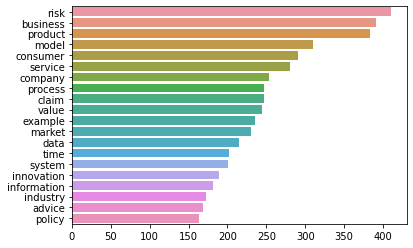

In [29]:
import seaborn as sns


x, y= [], []
for word,count in commonWords[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [30]:
# get most common proper nouns
from collections import defaultdict, Counter
from spacy.symbols import nsubj, VERB, dobj, NOUN, root, xcomp, PROPN, NUM,SYM
# all tokens that arent stop words or punctuations
words=[]
for doc in fullDocs.NLP:
    
    words += [token.lemma_ for token in doc if token.pos==PROPN and (not token.lemma_ in STOP_WORDS)\
             and (len(token)>1)] 


# five most common tokens
wordFreq = Counter(words)
commonWords = wordFreq.most_common(20)
print(commonWords)

[('insurtech', 172), ('mi', 163), ('swiss', 148), ('ai', 100), ('sigma', 98), ('digital', 90), ('data', 85), ('institute', 78), ('mckinsey', 67), ('iais', 61), ('iot', 58), ('com', 53), ('november', 50), ('robo', 49), ('www', 48), ('committee', 48), ('ceo', 47), ('united', 45), ('china', 42), ('q4', 40)]


<AxesSubplot:>

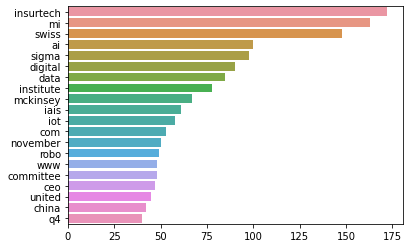

In [31]:
import seaborn as sns


x, y= [], []
for word,count in commonWords[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [32]:
# most frequest ORG entities
entities=[]
for doc in fullDocs.NLP:
    # all entities
    for ent in doc.ents:
        #print(ent.text)
        if ent.label_ == 'ORG':
            if ent.text not in STOP_WORDS:
                entities += [ent.text]
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

[('insurtech', 76), ('iais executive committee', 36), ('mckinsey', 26), ('digital', 20), ('oecd', 20), ('fca', 17), ('regtech', 13), ('dlt', 11), ('alibaba', 10), ('allianz', 10), ('rpa', 9), ('accenture', 9), ('q4', 9), ('cb', 9), ('facebook', 8), ('coe', 8), ('eu', 8), ('capgemini world', 8), ('aviva', 7), ('cdo', 7), ('swiss sigma', 7), ('google', 6), ('mvp', 6), ('amazon', 6), ('bima', 6), ('mi', 6), ('roi', 6), ('usaa', 5), ('g20', 5), ('fintech', 5), ('bafin', 5), ('cltv', 5), ('axa', 5), ('ftc', 5), ('iot', 4), ('mckinsey com', 4), ('apis', 4), ('amf', 4), ('allstate', 4), ('ovum', 4)]


<AxesSubplot:>

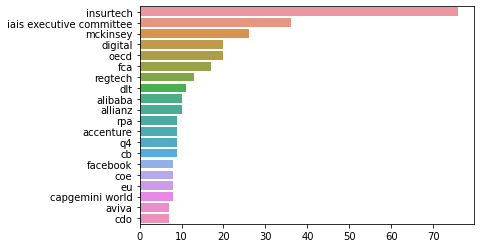

In [33]:
import seaborn as sns


x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [34]:
# most frequest PERSON entities
entities=[]
for doc in fullDocs.NLP:
    # all entities
    for ent in doc.ents:
        #print(ent.text)
        if ent.label_ == 'PERSON':
            if ent.text not in STOP_WORDS:
                entities += [ent.text]
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

[('leslie willcocks', 10), ('tanguy catlin', 6), ('andrew brem', 6), ('bima', 6), ('holger wilms', 4), ('bafin', 4), ('christopher geczy', 4), ('christopher morrison', 3), ('johannes tobias lorenz', 3), ('bjorn munstermann', 3), ('tobias lorenz', 3), ('scott simony', 3), ('sandeep bakshi', 2), ('matthew donaldson', 2), ('ido segev', 2), ('mendel', 2), ('nauto', 2), ('dan ariely', 2), ('parker shi', 2), ('oliver bate', 2), ('david stachon', 2), ('christopher', 2), ('markus loffler', 2), ('leslie willcocks rpa', 2), ('clara shih', 2), ('marcus ryu co', 2), ('robo', 2), ('evia', 2), ('christopher geczy phd', 2), ('tina rosenberg', 2), ('com bima', 2), ('moore', 2), ('willis towers', 2), ('j sheth et al', 2), ('klinc', 2), ('acord', 2), ('iais', 2), ('johannes tobias', 1), ('tom king linus lundberg adam lyons', 1), ('bill madison', 1)]


<AxesSubplot:>

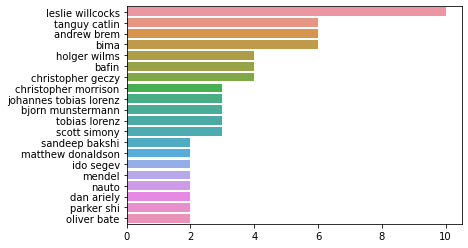

In [35]:
import seaborn as sns


x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Let us test TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import string
vectorizer = TfidfVectorizer(max_features=4096)
ents=[]
for doc in fullDocs.NLP:
    # all entities
    words=[]
    words += [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True \
              and token.is_space != True and token.pos != NUM and token.pos != SYM \
              and token.text != '©' and (not token.text in STOP_WORDS)and (not token.lemma_ in STOP_WORDS)]
    ents.append(' '.join(words))
entitiesdf=pd.DataFrame(ents)
entitiesdf.head()

,0
0,digital disruption cut noise content preface f...
1,white paper streamline automotive claim proces...
2,issue paper increase digitalisation potential ...
3,application ai insurtech real estate introduct...
4,machine intelligence executive summary machine...


In [37]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [38]:
def top_features_in_document(mat, features, row_id, top_n=25):
    row = np.squeeze(mat[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [39]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.2, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [40]:
# Initialize the vectorizer with new settings and check the new vocabulary length
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.1, ngram_range=(1,1))
cvec_counts=cvec.fit_transform(entitiesdf[entitiesdf.columns[0]])
len(cvec.vocabulary_)
print ('sparse matrix shape:', cvec_counts.shape)
print ('nonzero count:', cvec_counts.nnz)
print (' sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [ ]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

In [ ]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

In [ ]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

In [41]:
transformed_weights.toarray().shape

NameError: name 'transformed_weights' is not defined

In [ ]:
entitiesdf.head()
dfv = vectorizer.fit_transform(entitiesdf[entitiesdf.columns[0]]) 
scores = (dfv.toarray()) 
print("\n\nScores : \n", scores) 
dfv.shape

In [ ]:
#warray = transformed_weights.toarray()
warray = dfv.toarray()
warray = warray-np.mean(warray,axis=0)
evecs,evalues,V0 =np.linalg.svd(transformed_weights.toarray())
evecs

In [ ]:
evalues

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=42)
dfvRed= pca.fit_transform(warray)
dfvRed.shape

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# run kmeans with many different k
distortions = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(dfvRed)
    #kmeanModel.fit(dfvRed)
    distortions.append(kmeanModel.inertia_)
    print('Processed {} clusters'.format(k))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(dfvRed)

In [ ]:
kmeans.cluster_centers_

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(dfvRed[:,0], dfvRed[:,1],dfvRed[:,2], c=pred_y);


In [ ]:
plt.scatter(dfvRed[:,0], dfvRed[:,1],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
fullDocs[pred_y==1]

# Let us compare documents similarities using spacy similarity

In [42]:
similarityList=[]
for doc in fullDocs.NLP:
    docSimilarity=[]
    for compDoc in fullDocs.NLP:
        docSimilarity.append(doc.similarity(compDoc))
    similarityList.append(docSimilarity)

In [43]:
similarityDF= pd.DataFrame(data=similarityList)

In [44]:
similarityDF.head()

,0,1,2,3,4,5,6
0,1.000000,0.965047,0.982518,0.956143,0.976785,0.989613,0.980943
1,0.965047,1.000000,0.973535,0.959908,0.964634,0.973661,0.970273
2,0.982518,0.973535,1.000000,0.960628,0.972139,0.990891,0.991848
3,0.956143,0.959908,0.960628,1.000000,0.942421,0.971378,0.966452
4,0.976785,0.964634,0.972139,0.942421,1.000000,0.977554,0.968809


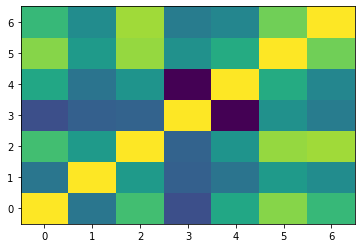

In [45]:
import matplotlib.pyplot as plt
plt.pcolor(similarityDF)
plt.yticks(np.arange(0.5, len(similarityDF.index), 1), similarityDF.index)
plt.xticks(np.arange(0.5, len(similarityDF.columns), 1), similarityDF.columns)
plt.show()

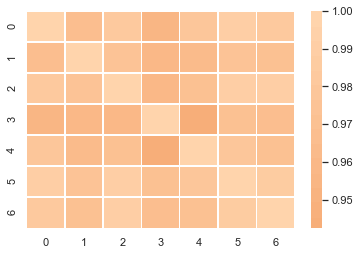

In [46]:
sns.set()

ax = sns.heatmap(similarityDF,linewidths=.5,center=.5)

# Let us use vector norm to calculate their distance

In [47]:
similarityList=[]
for doc in fullDocs.NLP:
    docSimilarity=[]
    for compDoc in fullDocs.NLP:
        #docSimilarity.append(np.dot(doc.vector,compDoc.vector))
        docSimilarity.append(np.linalg.norm(doc.vector-compDoc.vector))
    similarityList.append(docSimilarity)

In [48]:
similarityDFVec= pd.DataFrame(data=similarityList)

In [49]:
similarityDFVec.head()

,0,1,2,3,4,5,6
0,0.000000,0.776320,0.556338,0.927239,0.633790,0.426797,0.574516
1,0.776320,0.000000,0.682422,0.864066,0.773400,0.676169,0.708983
2,0.556338,0.682422,0.000000,0.909846,0.699998,0.402149,0.383655
3,0.927239,0.864066,0.909846,0.000000,1.005958,0.802749,0.813616
4,0.633790,0.773400,0.699998,1.005958,0.000000,0.624837,0.727521


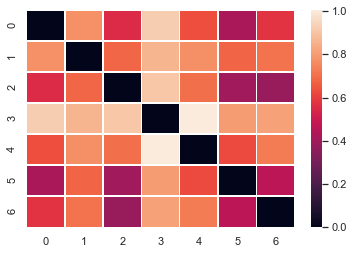

In [50]:
sns.set()

ax = sns.heatmap(similarityDFVec,linewidths=.5)

# Let us use entity vector average  to calculate similarities

In [51]:
# most frequestentities
entities=[]
for doc in fullDocs.NLP:
    # all entities
    for ent in doc.ents:
#        for token in ent:
            if ent.label_!= 'MONEY' and ent.label_!= 'CARDINAL' and ent.label_!= 'QUANTITY' \
            and ent.label_!= 'PERCENT' and ent.label_!= 'TIME' and ent.label_!= 'ORDINAL' \
            and ent.label_!= 'DATE' and ent.label_!= 'PERSON' and ent.label_!= 'GPE':
                #print(token.ent_type_)
                if ent.text not in STOP_WORDS:
                    entities += [ent.text]
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

[('insurtech', 79), ('iais executive committee', 36), ('mckinsey', 26), ('swiss', 23), ('digital', 20), ('oecd', 20), ('fca', 17), ('european', 15), ('mi', 15), ('chinese', 14), ('regtech', 13), ('dlt', 11), ('alibaba', 10), ('allianz', 10), ('rpa', 9), ('accenture', 9), ('q4', 9), ('cb', 9), ('facebook', 8), ('coe', 8), ('eu', 8), ('capgemini world', 8), ('swiss sigma', 8), ('sigma', 8), ('aviva', 7), ('amazon', 7), ('cdo', 7), ('fintech', 7), ('iot', 6), ('google', 6), ('mvp', 6), ('bima', 6), ('roi', 6), ('german', 5), ('apis', 5), ('usaa', 5), ('g20', 5), ('bafin', 5), ('asia', 5), ('cltv', 5)]


In [52]:
def getAverageEntityVector(doc):
    vectorAvg = 0
    i=0
    for ent in doc.ents:
        if ent.label_!= 'MONEY' and ent.label_!= 'CARDINAL' and ent.label_!= 'QUANTITY' \
        and ent.label_!= 'PERCENT' and ent.label_!= 'TIME' and ent.label_!= 'ORDINAL' \
        and ent.label_!= 'DATE' and ent.label_!= 'PERSON' and ent.label_!= 'GPE':
            if ent.text not in STOP_WORDS:
                vectorAvg += ent.vector
                i+=1
    if i>0:
        vectorAvg=vectorAvg/i
    else:
        vectotAvg=float('Inf')
    return vectorAvg

In [53]:
# calculate average entity vector for documents
entitiesVec=[]
for doc in fullDocs.NLP:
    # all entities
    vectorAvg=getAverageEntityVector(doc)
    entitiesVec.append(vectorAvg)    


In [54]:
# compare all documents using entityt similarity vectors
similarityList=[]
for ents in entitiesVec:
    docSimilarity=[]
    for entComp in entitiesVec:
        #docSimilarity.append(np.dot(doc.vector,compDoc.vector))
        docSimilarity.append(np.linalg.norm(ents-entComp))
    similarityList.append(docSimilarity)

In [55]:
similarityDFVecAvg= pd.DataFrame(data=similarityList)

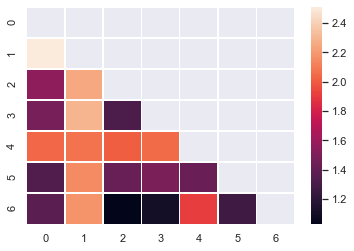

In [56]:
sns.set()
mask = np.zeros_like(similarityDF, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(similarityDFVecAvg,linewidths=.5, mask=mask)

In [ ]:
def searchClosestDocumentDocLevel(text):
    searchQueryNLP=nlp(text)
    simQuery=[]
    for i,doc in fullDocs.iterrows():
        simQuery.append((np.linalg.norm(doc.NLP.vector-searchQueryNLP.vector),i))
    simQuery.sort()
    idMin=simQuery[0][1]
    return idMin

In [ ]:
def searchClosestDocumentEntLevel(text):
    searchQueryNLP=nlp(text)
    simQuery=[]
    for i,doc in fullDocs.iterrows():
        simQuery.append((np.linalg.norm(getAverageEntityVector(doc.NLP)-getAverageEntityVector(searchQueryNLP)),i))
    simQuery.sort()
    idMin=simQuery[0][1]
    return idMin

In [ ]:
text='LOOKING FOR INNOVATION IN CLAIMS PROCESSING'
id= searchClosestDocumentDocLevel(text)
fullDocs.iloc[id].Name

In [ ]:
text='we need to submit a proposal for a master data management system'
id= searchClosestDocumentDocLevel(text)
fullDocs.iloc[id].Name

In [ ]:
text='we need to submit a proposal for claim notification'
id= searchClosestDocumentEntLevel(text)
fullDocs.iloc[id].Name

In [ ]:
text='we need to submit a proposal  for broker risk placement'
id= searchClosestDocumentEntLevel(text)
fullDocs.iloc[id].Name

# Let us use sentences vector  to calculate similarities

In [ ]:
def getAverageSentenceVector(doc):
    vectorAvg = 0
    i=0
    for sent in doc.sents:
        vectorAvg += sent.vector
        i+=1
    if i>0:
        vectorAvg=vectorAvg/i
    else:
        vectorAvg=float('Inf')
    return vectorAvg

In [ ]:
# calculate average entity vector for documents
entitiesVec=[]
for doc in fullDocs.NLP:
    # all entities
    vectorAvg=getAverageSentenceVector(doc)
    entitiesVec.append(vectorAvg)  

In [ ]:
# compare all documents using sentence similarity vectors
similarityList=[]
for ents in entitiesVec:
    docSimilarity=[]
    for entComp in entitiesVec:
        #docSimilarity.append(np.dot(doc.vector,compDoc.vector))
        docSimilarity.append(np.linalg.norm(ents-entComp))
    similarityList.append(docSimilarity)

In [ ]:
similarityDFVecAvg= pd.DataFrame(data=similarityList)

In [ ]:
sns.set()
mask = np.zeros_like(similarityDF, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(similarityDFVecAvg,linewidths=.5, mask=mask)

In [ ]:
def searchClosestDocumentSentLevel(text):
    searchQueryNLP=nlp(text)
    simQuery=[]
    for i,doc in fullDocs.iterrows():
        simQuery.append((np.linalg.norm(getAverageSentenceVector(doc.NLP)-getAverageSentenceVector(searchQueryNLP)),i))
    simQuery.sort()
    idMin=simQuery[0][1]
    return idMin

In [ ]:
text='What are innovations in underwriting ?'
id= searchClosestDocumentSentLevel(text)
fullDocs.iloc[id].Name

In [ ]:
text='What about claim notification.'
id= searchClosestDocumentSentLevel(text)
fullDocs.iloc[id].Name

In [ ]:
for sent in nlp(text).sents:
    print(sent)

# Let us try texthero

In [ ]:
import texthero as hero

In [ ]:
fullDocs['cleantext']=hero.clean(fullDocs.Text)

In [ ]:
fullDocs['tfidf_cleantext'] = hero.tfidf(fullDocs['cleantext'])

In [ ]:
fullDocs['pca_tfidf_clean_text'] = hero.pca(fullDocs['tfidf_cleantext'])

In [ ]:
hero.scatterplot(fullDocs, col='pca_tfidf_clean_text',title="Document")

In [ ]:
hero.kmeans(fullDocs['pca_tfidf_clean_text'] , n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=- 1, algorithm='auto')

# What about NLTK

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
def split_to_sentences(data):
    """
    Split data by linebreak "\n"
    
    Args:
        data: str
    
    Returns:
        A list of sentences
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    sentences = data.split("\n")
    ### END CODE HERE ###
    
    # Additional clearning (This part is already implemented)
    # - Remove leading and trailing spaces from each sentence
    # - Drop sentences if they are empty strings.
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    
    return sentences    

In [ ]:
def tokenize_sentences(sentences):
    """
    Tokenize sentences into tokens (words)
    
    Args:
        sentences: List of strings
    
    Returns:
        List of lists of tokens
    """
    
    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Go through each sentence
    for sentence in sentences:
        
        # Convert to lowercase letters
        sentence = sentence.lower()
        
        # Convert into a list of words
        tokenized = nltk.word_tokenize(sentence)
        
        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)
    
    ### END CODE HERE ###
    
    return tokenized_sentences

In [ ]:
fullDocs["nltkText"]=fullDocs.Text.apply(split_to_sentences).apply(tokenize_sentences)

In [ ]:
fullDocs.head()

In [ ]:
def get_words_with_nplus_frequency(tokenized_sentences, count_threshold):
    """
    Find the words that appear N times or more
    
    Args:
        tokenized_sentences: List of lists of sentences
        count_threshold: minimum number of occurrences for a word to be in the closed vocabulary.
    
    Returns:
        List of words that appear N times or more
    """
    # Initialize an empty list to contain the words that
    # appear at least 'minimum_freq' times.
    closed_vocab = []
    
    # Get the word couts of the tokenized sentences
    # Use the function that you defined earlier to count the words
    word_counts = count_words(tokenized_sentences)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # for each word and its count
    for word, cnt in word_counts.items(): # complete this line
        
        # check that the word's count
        # is at least as great as the minimum count
        if cnt>= count_threshold:
            
            # append the word to the list
            closed_vocab.append(word)
    ### END CODE HERE ###
    
    return closed_vocab

In [ ]:
def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    """
    Replace words not in the given vocabulary with '<unk>' token.
    
    Args:
        tokenized_sentences: List of lists of strings
        vocabulary: List of strings that we will use
        unknown_token: A string representing unknown (out-of-vocabulary) words
    
    Returns:
        List of lists of strings, with words not in the vocabulary replaced
    """
    
    # Place vocabulary into a set for faster search
    vocabulary = set(vocabulary)
    
    # Initialize a list that will hold the sentences
    # after less frequent words are replaced by the unknown token
    replaced_tokenized_sentences = []
    
    # Go through each sentence
    for sentence in tokenized_sentences:
        
        # Initialize the list that will contain
        # a single sentence with "unknown_token" replacements
        replaced_sentence = []
        ### START CODE HERE (Replace instances of 'None' with your code) ###

        # for each token in the sentence
        for token in sentence: # complete this line
            
            # Check if the token is in the closed vocabulary
            if token in vocabulary: # complete this line
                # If so, append the word to the replaced_sentence
                replaced_sentence.append(token)
            else:
                # otherwise, append the unknown token instead
                replaced_sentence.append(unknown_token)
        ### END CODE HERE ###
        
        # Append the list of tokens to the list of lists
        replaced_tokenized_sentences.append(replaced_sentence)
        
    return replaced_tokenized_sentences

In [ ]:
def preprocess_data(train_data, test_data, count_threshold):
    """
    Preprocess data, i.e.,
        - Find tokens that appear at least N times in the training data.
        - Replace tokens that appear less than N times by "<unk>" both for training and test data.        
    Args:
        train_data, test_data: List of lists of strings.
        count_threshold: Words whose count is less than this are 
                      treated as unknown.
    
    Returns:
        Tuple of
        - training data with low frequent words replaced by "<unk>"
        - test data with low frequent words replaced by "<unk>"
        - vocabulary of words that appear n times or more in the training data
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Get the closed vocabulary using the train data
    vocabulary = get_words_with_nplus_frequency(train_data,count_threshold)
    
    # For the train data, replace less common words with "<unk>"
    train_data_replaced = replace_oov_words_by_unk(train_data, vocabulary)
    
    # For the test data, replace less common words with "<unk>"
    test_data_replaced = replace_oov_words_by_unk(test_data,vocabulary)
    
    ### END CODE HERE ###
    return train_data_replaced, test_data_replaced, vocabulary

# Let us try Azure Analytics

In [57]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient


ModuleNotFoundError: No module named 'azure'

In [ ]:
#just a quick check that everything is working correctly

credential = AzureKeyCredential("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
endpoint="https://textanalyticspr.cognitiveservices.azure.com/"

text_analytics_client = TextAnalyticsClient(endpoint, credential)

documents = [
    "I did not like the restaurant. The food was too spicy.",
    "The restaurant was decorated beautifully. The atmosphere was unlike any other restaurant I've been to.",
    "The food was yummy. :)"
]

response = text_analytics_client.analyze_sentiment(documents, language="en")
result = [doc for doc in response if not doc.is_error]

for doc in result:
    print("Overall sentiment: {}".format(doc.sentiment))
    print("Scores: positive={}; neutral={}; negative={} \n".format(
        doc.confidence_scores.positive,
        doc.confidence_scores.neutral,
        doc.confidence_scores.negative,
    ))

In [ ]:
# let us create the entity recognition endpoint
text_analytics_client = TextAnalyticsClient(endpoint, credential)

In [ ]:
fullDocs['cleanText'][3]

In [ ]:
# let us get all entities looping through all sentences
response=[]
for sent in sentences:
    response.append(text_analytics_client.recognize_entities([sent], language="en",logging_enable=True))



In [ ]:
#collect all entity texts
entities=[]
for res in response:
    result = [doc for doc in res if not doc.is_error]
    for doc in result:
        for entity in doc.entities:
            entities.append(entity.text)
#            print("Entity: \t", entity.text, "\tCategory: \t", entity.category,
#                  "\tConfidence Score: \t", entity.confidence_score)


In [ ]:
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

In [ ]:
import seaborn as sns


x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
#collect all entity categories
entities=[]
for res in response:
    result = [doc for doc in res if not doc.is_error]
    for doc in result:
        for entity in doc.entities:
            if entity.category=='Skill':
                entities.append(entity.text)

In [ ]:
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

In [ ]:
import seaborn as sns


x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# A few more experiments with wordcloud and LDA

In [ ]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wc = wordcloud.WordCloud()

# Generate a word cloud
wc.generate(long_string)

# Visualize the word cloud
wc.to_image()

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)